In [6]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage import io
from scipy import ndimage
from sklearn.externals import joblib
from keras.preprocessing import image
from sklearn.utils import shuffle
import glob

In [10]:
clf = joblib.load('classificacio.pkl')
llista = joblib.load('llista.pkl')
llista

['motos', 'trucks', 'cars']

In [11]:
cap = cv2.VideoCapture('test1.mp4')

fgbg = cv2.createBackgroundSubtractorKNN()

In [12]:
while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)
    open_img = ndimage.binary_opening(fgmask)
    car = ndimage.binary_closing(open_img).astype(np.uint8)
    cnts = cv2.findContours(car, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    
    ROI_number = 0
    
    for c in cnts:
        mmax = 0
        ind = 0
        x,y,w,h = cv2.boundingRect(c)
        ROI = frame[y:y+h, x:x+w]
        if np.shape(ROI) > (40,40,3):
            img = cv2.resize(ROI, dsize=(64,64))
            test_image = np.expand_dims(img, axis=0)
            prediction = clf.predict(test_image)
            for j in range(len(prediction)):
                for k in range(len(prediction[j])):
                    if prediction[j][k] > mmax:
                        mmax = prediction[j][k]
                        ind = k
            if llista[ind] == "cars":
                imr = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
                cv2.putText(imr, "car", (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7, (0,0,255),2)
            elif llista[ind] == "motos":
                img = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
                cv2.putText(img, "moto", (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0),2)
            else:
                imb = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)                  
                cv2.putText(imb, "truck", (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0),2)
                
 
        ROI_number += 1
        
        
    cv2.imshow('copy', frame)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

[[1. 0. 0.]]


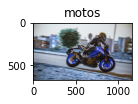

In [8]:
im = cv2.imread("moto.jpg")
img = cv2.resize(im, dsize=(64,64))
test_image = np.expand_dims(img, axis=0)
prediction = clf.predict(test_image)
print(prediction)
mmax = 0
ind = 0
for i in range(len(prediction)):
    for j in range(len(prediction[i])):
        if prediction[i][j] > mmax:
            mmax = prediction[i][j]
            ind = j
    plt.subplot(3,3,i+1)
    plt.imshow(im, cmap="gray")
    plt.title(llista[ind])